In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

In [265]:
alpha = 0.95
N, big_N = 100, 10000

In [266]:
def interval_plot(X, lower_bound, upper_bound):
    y1, y2 = np.zeros(N), np.zeros(N)
    for i in range(1, N + 1):
        y1[i-1], y2[i-1] = lower_bound(X[:i], i), upper_bound(X[:i], i)
    plt.figure(figsize=(16, 8))
    plt.fill_between(np.arange(1, N + 1), y1, y2)
    plt.ylim(np.min(y1), 2.*np.mean(y2))
    plt.show()

In [270]:
def accuracy_measure(distr, 
                     lower_bound, 
                     upper_bound, 
                     true_theta=1.
                    ):
    res = []
    for x in [10, 100]:
        true_positive = 0.
        for j in range(big_N):
            if (lower_bound(distr(x), x) < true_theta) and (true_theta < upper_bound(distr(x), x)):
                true_positive += 1.
        res.append(true_positive)
    print np.array(res) * (1./big_N)

# 1. Uniform

### a) X.mean

Доверительный интервал уровня $\alpha$ для $U(0, \theta)$:

$(\frac{2 \overline X}{1 + \sqrt{3n(1-\alpha)}}, \frac{2 \overline X}{1 - \sqrt{3n(1-\alpha)}})$

Эмпирическая вероятность попадания в интервал - 100%, так как он не точный и очень широкий:

In [271]:
lower_bound = lambda x, n: 2.*np.mean(x)/(1.+(3.*n*(1.-alpha))**-.5)
upper_bound = lambda x, n: 2.*np.mean(x)/(1.-(3.*n*(1.-alpha))**-.5)

In [272]:
accuracy_measure((lambda n: np.random.uniform(0, 1, n)), 
                  lower_bound, 
                  upper_bound,
                )

[ 1.  1.]


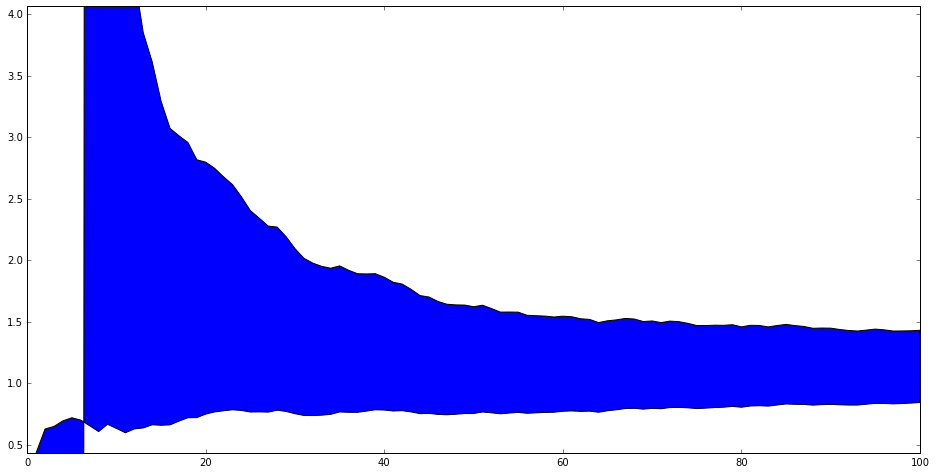

In [273]:
interval_plot(np.random.uniform(0, 1, N), 
              lower_bound, 
              upper_bound,
             )

### b) X.min

Точный доверительный интервал уровня $\alpha$:

$(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}})$

Видно, что интервал точный:

In [274]:
lower_bound = lambda x, n: np.min(x)
upper_bound = lambda x, n: np.min(x)/(1.-alpha ** (1./n))

In [275]:
accuracy_measure((lambda n: np.random.uniform(0., 1., n)), 
                  lower_bound, 
                  upper_bound,
                )

[ 0.9527  0.9494]


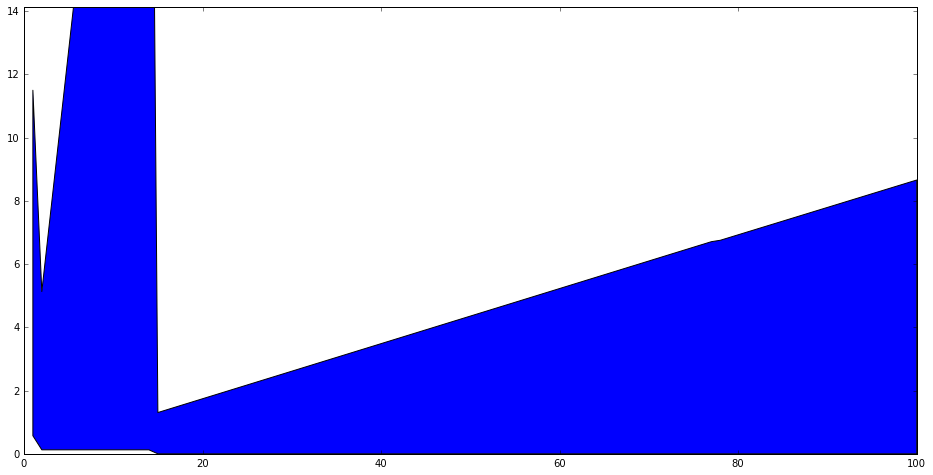

In [276]:
interval_plot(np.random.uniform(0., 1., N), 
              lower_bound, 
              upper_bound,
             )

### c) X.max

Точный доверительный интервал уровня $\alpha$:

$(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}})$

Видно, что интервал точный:

In [277]:
lower_bound = lambda x, n: np.max(x)
upper_bound = lambda x, n: np.max(x)/((1.-alpha)**(1./n))

In [278]:
accuracy_measure((lambda n: np.random.uniform(0.,1.,n)), 
                  lower_bound, 
                  upper_bound,
                )

[ 0.9484  0.9512]


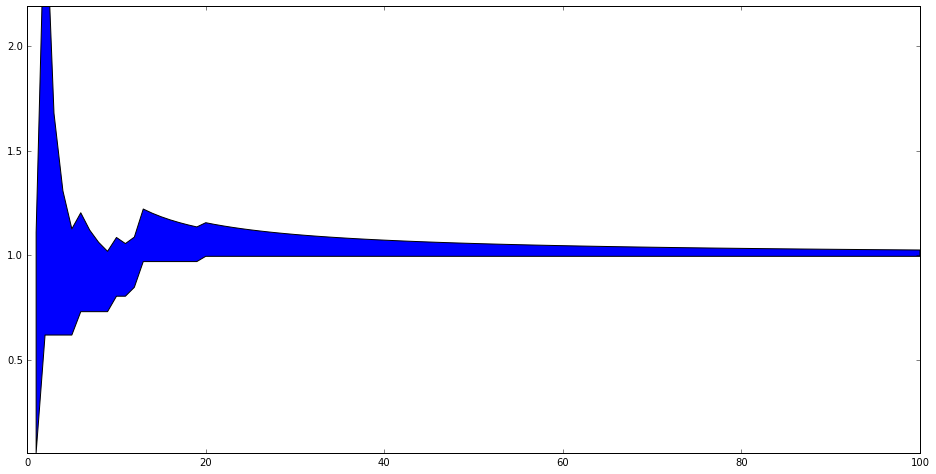

In [280]:
interval_plot(np.random.uniform(0., 1., N), 
              lower_bound, 
              upper_bound,
             )

# 2. Cauchy

Асимптотический доверительный интервал уровня $\alpha$ для $Cauchy(\theta, 1)$:

$(\mu - \frac{\pi z} {2 \sqrt{n}}, \mu + \frac{\pi z} {2 \sqrt{n}})$,

где $\mu$ - выборочная медиана (асимпт нормальная)

### Здесь и далее $z$ - квантиль нормального распределения уровня $\frac{\alpha + 1}{2}$ 

In [281]:
z = sts.norm.ppf((alpha+1.)/2.)

In [282]:
lower_bound = lambda x, n: np.median(x)-np.pi*z/(2.*(n**.5))
upper_bound = lambda x, n: np.median(x)+np.pi*z/(2.*(n**.5))

In [283]:
accuracy_measure((lambda n: np.random.standard_cauchy(n)+1.), 
                  lower_bound, 
                  upper_bound,
                )

[ 0.9207  0.9482]


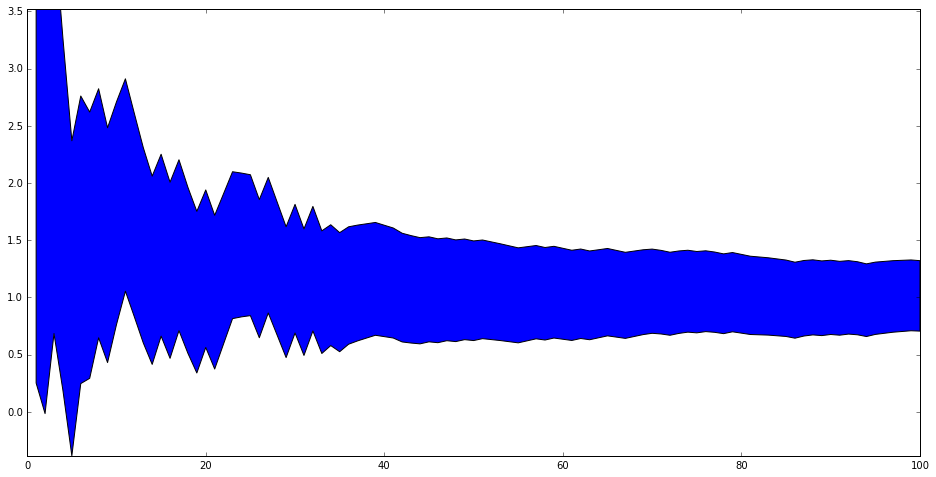

In [284]:
interval_plot(np.random.standard_cauchy(N)+1., 
              lower_bound, 
              upper_bound,
             )

# 3. Poisson

Асимптотический доверительный интервал уровня $\alpha$ для $Pois(\theta)$:

$(\overline X - z \frac{\overline X}{\sqrt{n}}, \overline X + z \frac{\overline X}{\sqrt{n}})$

In [285]:
lower_bound = lambda x, n: np.mean(x)-z*(np.mean(x)/n)**0.5 
upper_bound = lambda x, n: np.mean(x)+z*(np.mean(x)/n)**0.5

In [286]:
accuracy_measure((lambda n: np.random.poisson(1.,n)), 
                  lower_bound, 
                  upper_bound,
                )

[ 0.9293  0.9494]


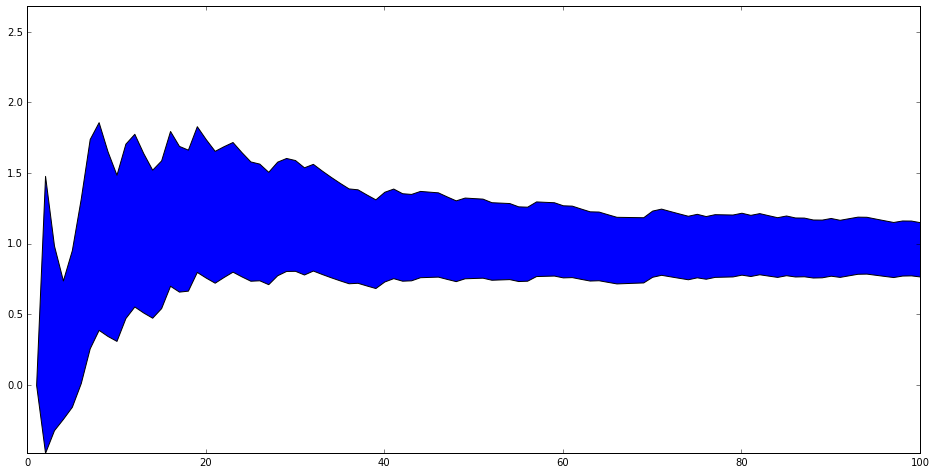

In [287]:
interval_plot(np.random.poisson(1., N), 
              lower_bound, 
              upper_bound,
             )

# 4. Gamma

Асимптотический доверительный интервал уровня $\alpha$ для $Г(\theta, \lambda)$:

$(\frac{\lambda - z \sqrt{\frac{\lambda}{n}}}{\overline X}, \frac{\lambda + z \sqrt{\frac{\lambda}{n}}}{\overline X})$

In [288]:
lower_bound = lambda x, n: (lamb-z*(lamb/n)**.5)/np.mean(x)
upper_bound = lambda x, n: (lamb+z*(lamb/n)**.5)/np.mean(x)

In [289]:
lamb = 1.
accuracy_measure((lambda n: np.random.gamma(lamb,.1,n)), 
              lower_bound,
              upper_bound,
              10.
             )

[ 0.9534  0.9499]


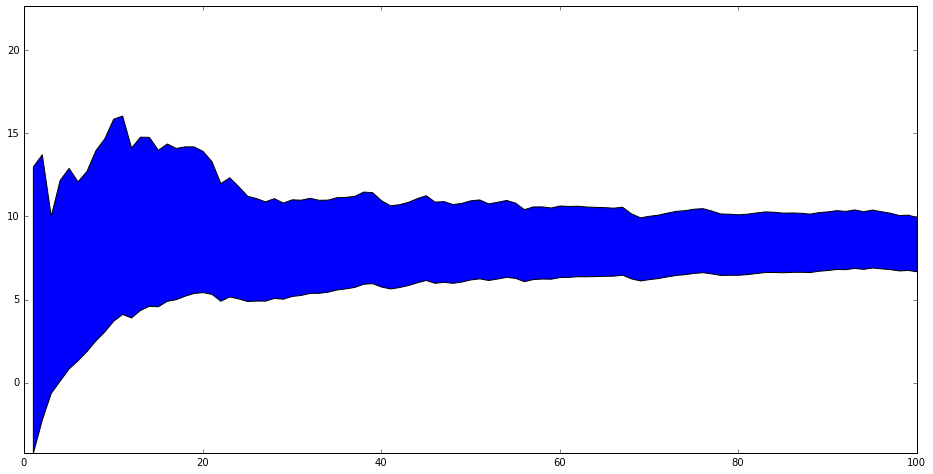

In [290]:
interval_plot(np.random.gamma(lamb,.1,N), 
              lower_bound,
              upper_bound,
             )

### Гениальный вывод:
(здесь мог быть гениальный вывод)

Если доверительный интервал неточный (слишком широкий), то вероятность попадания в него больше 0.95, а если точный - то она как раз около 0.95